Data Understanding and Processing (10 points)

Dr. Shen-Shyang Ho 

September 12, 2022

1. Download image dataset to your local drive.

(a) Go to the following Google Drive link (Students must be logged in to their Rowan accounts):

i. https://drive.google.com/drive/folders/1GfmG8cNpqSLlkBBIG2qUTRBG8yPmFW8d?usp=sharing

(b) Download the ’Negatives.zip’ file and the ’Weed-4class-(Your Dataset Number).zip’ file from the Google Drive Link.

(c) Extract the contents of each zip file into the directory where your python scripts will be held.

i. Each extraction should produce a folder of the same name.

ii. Inside each folder are the image files with a .csv file containing the labels.

(d) Download the file ’getting-started.py’ file from Canvas and place it in the same directory as the extract folders.

i. This file requires the pandas and matplotlib python libraries which can be installed using the following command in your terminal: ’pip install pandas matplotlib’

(e) Inside that script set the DATASET NUMBER variable to your assigned number, then run that script. This will combine the two extracted folders into a single dataset.

i. Everything will be combined into the ’Weed-4class-(Your Dataset Number)’ folder

ii. If everything has been done correctly, a screen with 12 random images should be presented to you.


2. Use OpenCV to perform image processing and feature extraction

(Reference: https://docs.opencv.org/4.x/d6/d00/tutorial py root.html)

(a) Histogram Equalization (Image Intensity Normalization)

i. Choose 10 random images from your dataset (two from each class).

ii. Convert the color images to grayscale images (MUST use iteration; No points given if no iteration is used) (0.5 point)

iii. Plot 10 grayscale images with their corresponding pixel intensity histograms. (0.5 point)

iv. Perform histogram equalization on the 10 images. Plot the NEW intensity equalized grayscale images and their corresponding equalized pixel intensity histograms. (1.5 point)

v. Pick a grayscale image and its corresponding equalized image. Plot the 2 images next to each other. What did you observe? (0.5 point)

(b) RGB histogram

i. Choose 5 random images from your dataset (one from each class and different from Quesion 2)

ii. Plot the images with their corresponding RGB histograms (The three histograms MUST be in one image). (1 point)

(c) Histogram Comparison (Measures of Similarity and Dissimilarity)

i. Pick 2 images from the same class and 1 image from another class.

ii. Perform histogram comparison using the following metrics/measures.
• Euclidean Distance
• Manhattan Distance
• Bhattacharyya distance
• Histogram Intersection

For this task, you will compare histogram by computing the metrics/measures of (1) the 2 images from the same class, AND (2) 2 images from different classes. (2 points) (Note: You can also use other packages.)

(d) Image Feature Descriptor: SURF (Speeded-Up Robust Feature)

i. Pick a random image and perform keypoint extraction using SURF feature descriptor with 128 dimensions.

ii. Use a threshold value so that you obtain 40-50 keypoints in the image. What is the threshold you use? What is the number of keypoints you extracted? (1.5 points)

## Question 1 

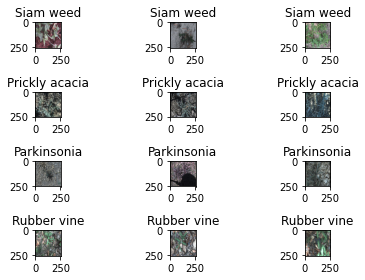

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from shutil import copyfile, rmtree
import os
import random

# CHANGES TO YOUR ASSIGNED NUMBER
DATASET_NUMBER = "67"


CWD = os.path.abspath(os.getcwd())
NEGATIVES_DIR = os.path.join(CWD, "Negatives")
FOUR_CLASS_DIR = os.path.join(CWD, "Weed-4class-{}".format(DATASET_NUMBER))

NEGATIVE_LABELS_FILE = os.path.join(NEGATIVES_DIR, "Negatives.csv")
FOUR_CLASS_LABELS_FILE = os.path.join(FOUR_CLASS_DIR, "Weed-4class-{}-labels.csv".format(DATASET_NUMBER))

FILENAME_COL = "Filename"
SPECIES_COL = "Species"

def combine_datasets(): 
    negatives_df = pd.read_csv(NEGATIVE_LABELS_FILE)
    four_class_df = pd.read_csv(FOUR_CLASS_LABELS_FILE)


    species = list(set(four_class_df[SPECIES_COL]))
    combined_df = pd.concat([negatives_df, four_class_df])

    os.remove(FOUR_CLASS_LABELS_FILE)

    combined_df.to_csv(FOUR_CLASS_LABELS_FILE, index = False)

    for i in range(len(negatives_df.index)):  
        file_name = negatives_df[FILENAME_COL].values[i]

        src = os.path.join(NEGATIVES_DIR, file_name)
        dst = os.path.join(FOUR_CLASS_DIR, file_name)
        copyfile(src, dst)

    rmtree(path = NEGATIVES_DIR, ignore_errors=True)

    return combined_df, species

def show_random_images(combined_df, species):
    num_chosen_imgs = 3
    num_rows = 4
    num_cols = num_chosen_imgs

    cur_subplot_index = 1

    for spec in species:
        cur_spec_df = combined_df.loc[combined_df[SPECIES_COL] == spec]

        img_numbers_chosen = random.sample(range(len(cur_spec_df.index)), k = num_chosen_imgs)

        for num in img_numbers_chosen: 
            file_name = cur_spec_df[FILENAME_COL].values[num]
            pic_title = cur_spec_df[SPECIES_COL].values[num]

            src = os.path.join(FOUR_CLASS_DIR, file_name)
            image = mpimg.imread(src)

            plt.subplot(num_rows, num_cols, cur_subplot_index)
            plt.title(pic_title)
            cur_subplot_index += 1
            plt.imshow(image)

    plt.tight_layout()
    plt.show()
    

if __name__ == "__main__": 
   
    combined_df, species = combine_datasets()
    show_random_images(combined_df, species)


## Question 2

### (a) Histogram Equalization (Image Intensity Normalization)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from shutil import copyfile, rmtree
import os
import random
import cv2

# CHANGES TO YOUR ASSIGNED NUMBER
DATASET_NUMBER = "67"

CWD = os.path.abspath(os.getcwd())
CLASS5_DIR = os.path.join(CWD, "Weed-4class-{}".format(DATASET_NUMBER))

CLASS5_LABELS_FILE = os.path.join(CLASS5_DIR, "Weed-4class-{}-labels.csv".format(DATASET_NUMBER))

FILENAME_COL = "Filename"
SPECIES_COL = "Species"
class5_df = pd.read_csv(CLASS5_LABELS_FILE)


species = list(set(class5_df[SPECIES_COL]))

### (i) and (ii)

20171109-091719-3.jpg Rubber vine


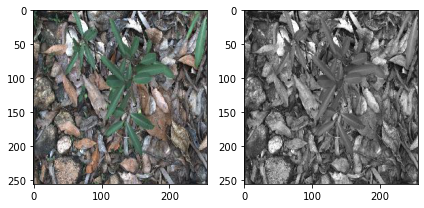

20171109-071703-1.jpg Rubber vine


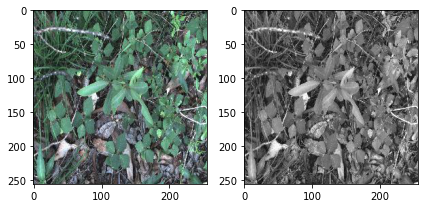

20170727-145407-3.jpg Prickly acacia


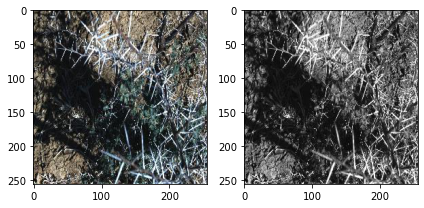

20170727-143740-1.jpg Prickly acacia


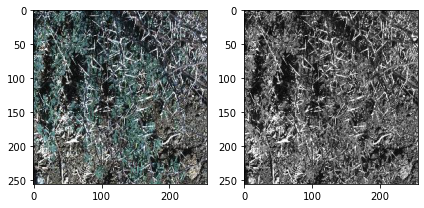

20180119-111132-1.jpg Negative


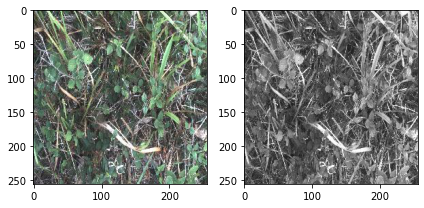

20171219-112019-3.jpg Negative


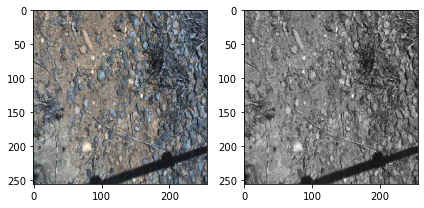

20171113-124314-1.jpg Siam weed


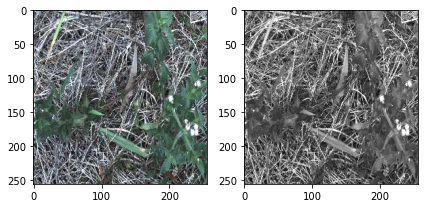

20171121-073120-1.jpg Siam weed


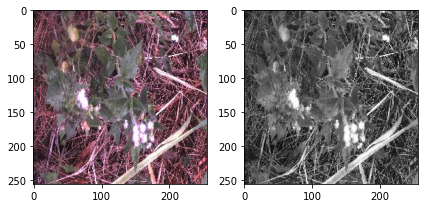

20170920-181420-1.jpg Parkinsonia


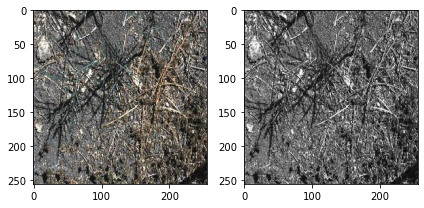

20171102-123222-1.jpg Parkinsonia


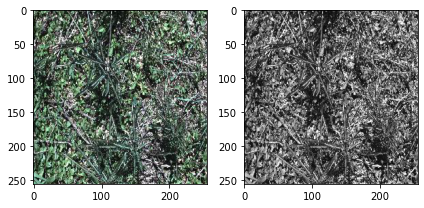

In [2]:
chosen_img = 2

for spec in species:
    cur_spec_df = class5_df.loc[class5_df[SPECIES_COL] == spec]

    img_numbers_chosen = random.sample(range(len(cur_spec_df.index)), k = chosen_img)

    for num in img_numbers_chosen:
        file_name = cur_spec_df[FILENAME_COL].values[num]
        pic_title = cur_spec_df[SPECIES_COL].values[num]
        print(file_name,pic_title)

        src = os.path.join(CLASS5_DIR, file_name)
        image = mpimg.imread(src)
        g_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

        plt.subplot(1,3,1)
        plt.imshow(image)
        plt.subplot(1,3,2)
        plt.imshow(g_image,cmap="gray")
        plt.subplot(1,3,3)
        plt.hist(g_image.ravel(),256,[0,256])
        

        plt.tight_layout()
        plt.show()

### (iii)

20171113-092631-1.jpg Rubber vine


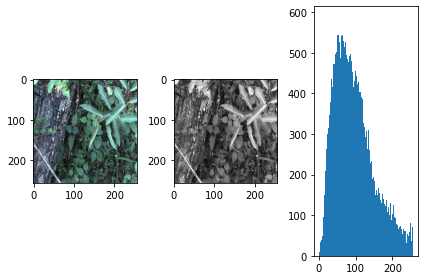

20171109-072742-3.jpg Rubber vine


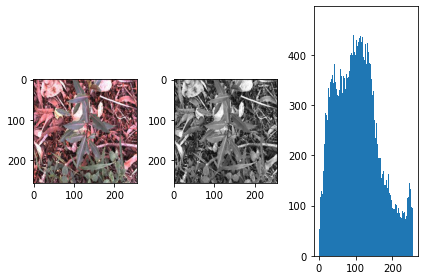

20170727-151953-3.jpg Prickly acacia


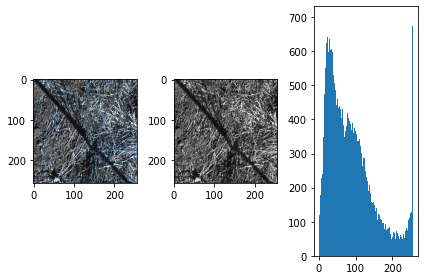

20170727-170947-1.jpg Prickly acacia


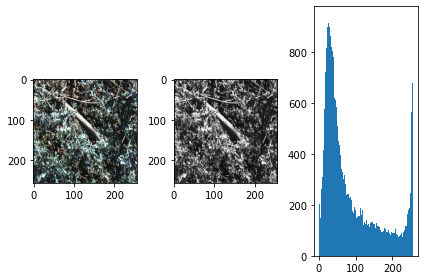

20180112-100517-1.jpg Negative


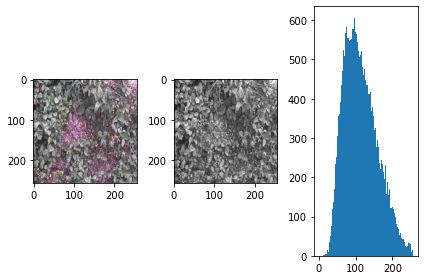

20171205-141130-2.jpg Negative


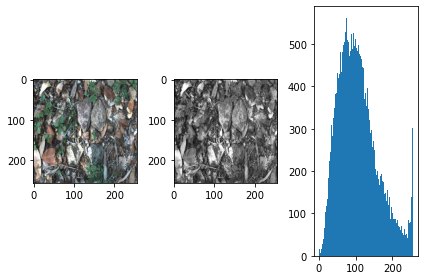

20171113-151802-1.jpg Siam weed


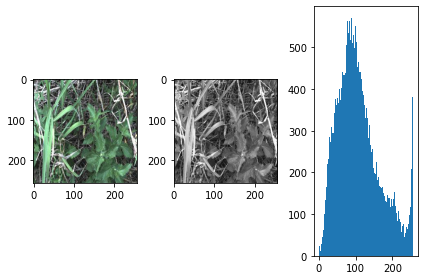

20171113-133727-1.jpg Siam weed


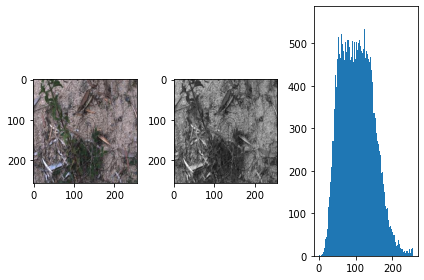

20171102-120557-3.jpg Parkinsonia


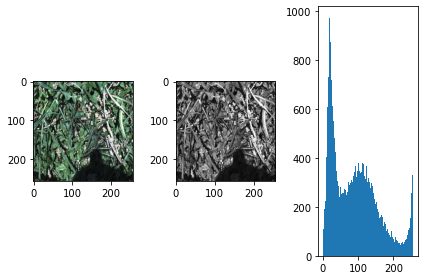

20170920-161941-3.jpg Parkinsonia


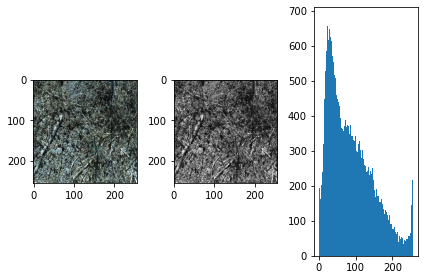

In [3]:
chosen_img = 2

for spec in species:
    cur_spec_df = class5_df.loc[class5_df[SPECIES_COL] == spec]

    img_numbers_chosen = random.sample(range(len(cur_spec_df.index)), k = chosen_img)

    for num in img_numbers_chosen:
        file_name = cur_spec_df[FILENAME_COL].values[num]
        pic_title = cur_spec_df[SPECIES_COL].values[num]
        print(file_name,pic_title)

        src = os.path.join(CLASS5_DIR, file_name)
        image = mpimg.imread(src)
        g_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

        plt.subplot(1,3,1)
        plt.imshow(image)
        plt.subplot(1,3,2)
        plt.imshow(g_image,cmap="gray")
        plt.subplot(1,3,3)
        plt.hist(g_image.ravel(),256,[0,256])
        

        plt.tight_layout()
        plt.show()

### (iv)

20171109-095805-3.jpg Rubber vine


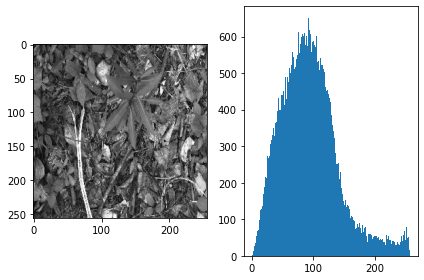

20171109-072625-1.jpg Rubber vine


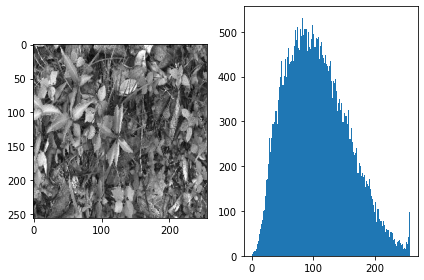

20170729-085707-2.jpg Prickly acacia


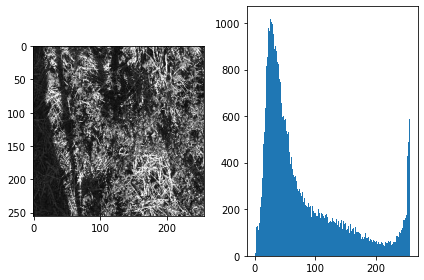

20170728-152836-2.jpg Prickly acacia


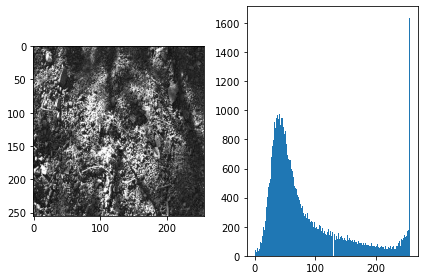

20171205-141004-2.jpg Negative


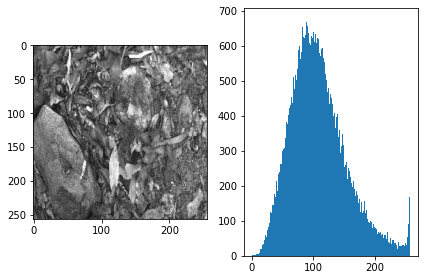

20171220-094659-1.jpg Negative


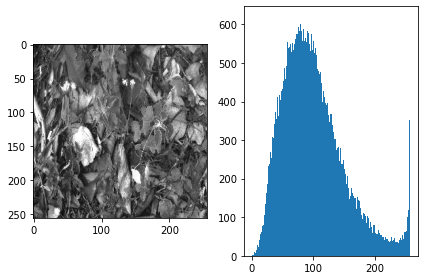

20171121-083458-1.jpg Siam weed


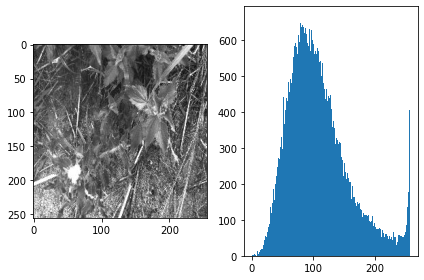

20171113-135243-1.jpg Siam weed


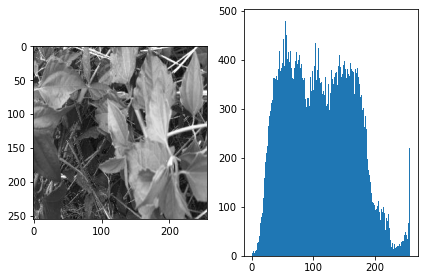

20170920-164059-3.jpg Parkinsonia


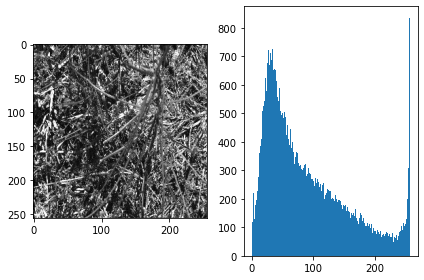

20170920-160318-3.jpg Parkinsonia


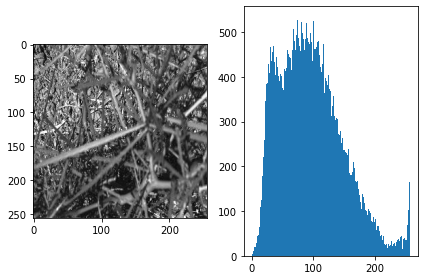

In [4]:
chosen_img = 2

for spec in species:
    cur_spec_df = class5_df.loc[class5_df[SPECIES_COL] == spec]

    img_numbers_chosen = random.sample(range(len(cur_spec_df.index)), k = chosen_img)

    for num in img_numbers_chosen:
        file_name = cur_spec_df[FILENAME_COL].values[num]
        pic_title = cur_spec_df[SPECIES_COL].values[num]
        print(file_name,pic_title)

        src = os.path.join(CLASS5_DIR, file_name)
        image = mpimg.imread(src)
        g_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        eq_image = cv2.normalize(g_image, None, alpha=1, beta=256, norm_type=cv2.NORM_MINMAX )

        plt.subplot(1,2,1)
        plt.imshow(eq_image,cmap="gray")
        plt.subplot(1,2,2)
        plt.hist(eq_image.ravel(),256,[0,256])
      
        
        plt.tight_layout()
        plt.show()

### (v)

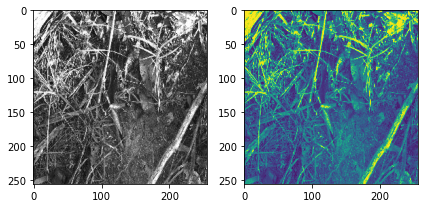

In [6]:
src = r"C:/Users/SHARMISHA/Desktop/Programming Assignment 1/Weed-4class-67/20170128-102719-0.jpg"
image = mpimg.imread(src)
g_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
eq_image = cv2.normalize(g_image, None, alpha=1, beta=256, norm_type=cv2.NORM_MINMAX )

plt.subplot(1,2,1)
plt.imshow(g_image,cmap="gray")
plt.subplot(1,2,2)
plt.imshow(eq_image)
plt.tight_layout()
plt.show()

### (b) RGB histogram

### (i) 

20171113-092801-1.jpg Rubber vine


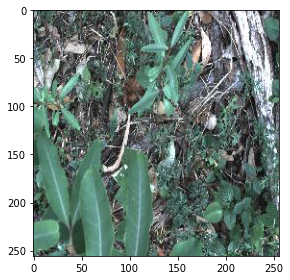

20170728-120448-2.jpg Prickly acacia


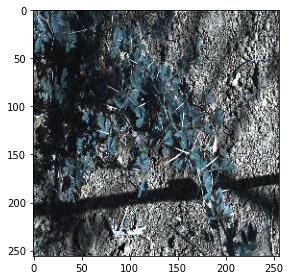

20180109-075438-2.jpg Negative


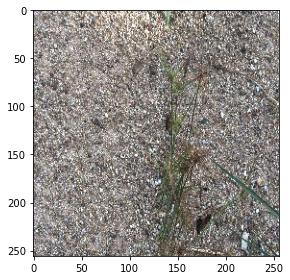

20171113-150545-1.jpg Siam weed


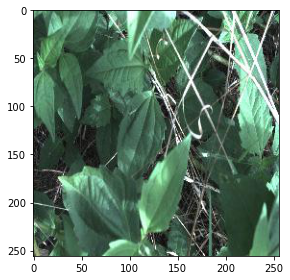

20171102-120545-2.jpg Parkinsonia


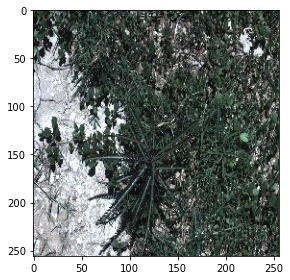

In [7]:
chosen_img = 1

for spec in species:
    cur_spec_df = class5_df.loc[class5_df[SPECIES_COL] == spec]

    img_numbers_chosen = random.sample(range(len(cur_spec_df.index)), k = chosen_img)

    for num in img_numbers_chosen:
        file_name = cur_spec_df[FILENAME_COL].values[num]
        pic_title = cur_spec_df[SPECIES_COL].values[num]
        print(file_name,pic_title)

        src = os.path.join(CLASS5_DIR, file_name)
        image = mpimg.imread(src)
        g_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

        plt.subplot(1,1,1)
        plt.imshow(image)
        
        

        plt.tight_layout()
        plt.show()

### (ii)

20171113-101853-3.jpg Rubber vine


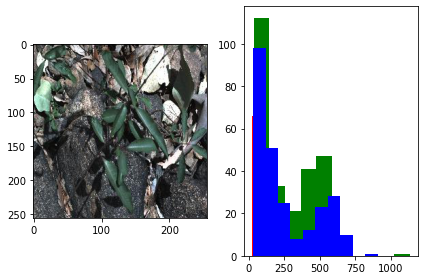

20170729-093144-3.jpg Prickly acacia


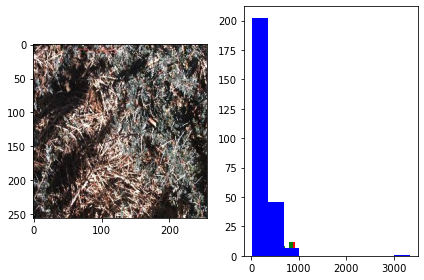

20180105-104316-1.jpg Negative


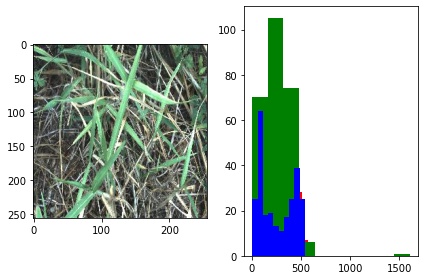

20171113-060628-1.jpg Siam weed


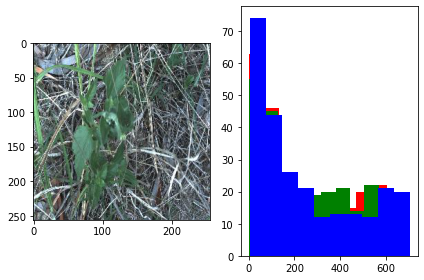

20171102-103046-2.jpg Parkinsonia


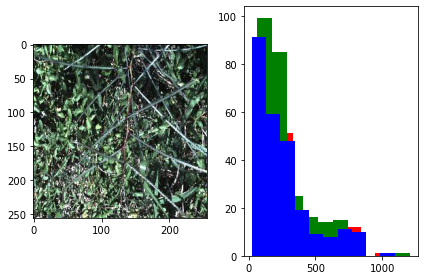

In [8]:
chosen_img = 1

for spec in species:
    cur_spec_df = class5_df.loc[class5_df[SPECIES_COL] == spec]

    img_numbers_chosen = random.sample(range(len(cur_spec_df.index)), k = chosen_img)

    for num in img_numbers_chosen:
        file_name = cur_spec_df[FILENAME_COL].values[num]
        pic_title = cur_spec_df[SPECIES_COL].values[num]
        print(file_name,pic_title)

        src = os.path.join(CLASS5_DIR, file_name)
        image = mpimg.imread(src)
        rgb_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

        plt.subplot(1,2,1)
        plt.imshow(image)
        plt.subplot(1,2,2)
        red=cv2.calcHist([rgb_image],[0],None,[256],[0,256])
        green=cv2.calcHist([rgb_image],[1],None,[256],[0,256])
        blue=cv2.calcHist([rgb_image],[2],None,[256],[0,256])
        plt.hist(red,color="red")
        plt.hist(green,color="green")
        plt.hist(blue,color="blue")
        
        

        plt.tight_layout()
        plt.show()

## (c)  Histogram Comparison (Measures of Similarity and Dissimilarity)

### (i)

In [9]:
RV_df = class5_df[class5_df[SPECIES_COL] == "Rubber vine"]
PA_df = class5_df[class5_df[SPECIES_COL] == "Prickly acacia"]
RV1_df = class5_df.loc[class5_df[SPECIES_COL] == "Rubber vine","Filename"].iloc[333]
RV2_df = class5_df.loc[class5_df[SPECIES_COL] == "Rubber vine","Filename"].iloc[350]
PA1_df = class5_df.loc[class5_df[SPECIES_COL] == "Prickly acacia","Filename"].iloc[1000]
print(RV1_df)
print(RV2_df)
print(PA1_df)

20171109-073553-1.jpg
20171109-074048-3.jpg
20171102-094000-1.jpg


### (ii)

In [10]:
src1 = r"C:/Users/SHARMISHA/Desktop/Programming Assignment 1/Weed-4class-67/20170128-102438-0.jpg"
src2 = r"C:/Users/SHARMISHA/Desktop/Programming Assignment 1/Weed-4class-67/20170128-102458-0.jpg"
src3 = r"C:/Users/SHARMISHA/Desktop/Programming Assignment 1/Weed-4class-67/20170128-102208-0.jpg"
image1 = mpimg.imread(src1,0)
image2 = mpimg.imread(src2,0)
image3 = mpimg.imread(src3,0)
hist_img1 = cv2.calcHist([image1],[0],None,[256],[0,256])
hist_img2 = cv2.calcHist([image2],[0],None,[256],[0,256])
hist_img3 = cv2.calcHist([image3],[0],None,[256],[0,256])
histvector1= np.reshape(hist_img1, -1)
histvector2= np.reshape(hist_img2, -1)
histvector3= np.reshape(hist_img3, -1)
print(histvector1)
print(histvector2)
print(histvector3)

[  94.   54.   17.   60.   77.   60.   80.  100.  115.  116.  168.  167.
  184.  238.  244.  311.  290.  338.  369.  403.  408.  538.  515.  545.
  583.  661.  695.  678.  723.  740.  759.  721.  749.  759.  792.  759.
  862.  768.  722.  756.  734.  732.  742.  709.  732.  693.  688.  688.
  648.  682.  711.  622.  617.  623.  556.  606.  563.  541.  533.  574.
  465.  498.  450.  469.  451.  456.  426.  425.  403.  411.  367.  376.
  372.  339.  340.  323.  353.  324.  323.  310.  327.  327.  296.  258.
  280.  269.  252.  282.  257.  247.  214.  224.  228.  208.  205.  227.
  173.  211.  198.  188.  181.  197.  204.  168.  163.  164.  159.  166.
  150.  167.  161.  162.  148.  146.  160.  139.  169.  145.  156.  127.
  140.  160.  109.  131.  123.  138.  135.  109.  119.  120.  117.  138.
  113.  112.  121.   99.  100.  107.  104.   97.   97.  114.  106.  110.
   93.  108.  105.   94.   81.   92.   90.  104.   85.   86.   95.   83.
   88.  101.  109.   98.  102.   99.   91.   78.   

In [11]:
Euclidean_distance_same=cv2.norm(histvector1,histvector2,normType=cv2.NORM_L2)
print("Euclidean Distance:",Euclidean_distance_same)
Euclidean_distance_diff=cv2.norm(histvector2,histvector3,normType=cv2.NORM_L2)
print("Euclidean Distance:",Euclidean_distance_diff)
Manhattan_distance_same=cv2.norm(histvector1,histvector2,normType=cv2.NORM_L2)
print("Manhattan Distance:",Manhattan_distance_same)
Manhattan_distance_diff=cv2.norm(histvector2,histvector3,normType=cv2.NORM_L2)
print("Manhattan Distance:",Manhattan_distance_diff)
Bhattacharyya_distance_same=cv2.compareHist(histvector1,histvector2,cv2.HISTCMP_BHATTACHARYYA)
print("Bhattacharyya Distance:",Bhattacharyya_distance_same)
Bhattacharyya_distance_diff=cv2.compareHist(histvector2,histvector3,cv2.HISTCMP_BHATTACHARYYA)
print("Bhattacharyya Distance:",Bhattacharyya_distance_diff)
Hist_Int_same=cv2.compareHist(histvector1,histvector2,cv2.HISTCMP_INTERSECT)
print("Histogram Intersection:",Hist_Int_same)
Hist_Int_diff=cv2.compareHist(histvector2,histvector3,cv2.HISTCMP_INTERSECT)
print("Histogram Intersection:",Hist_Int_diff)

Euclidean Distance: 1219.1677489172685
Euclidean Distance: 6067.182047705508
Manhattan Distance: 1219.1677489172685
Manhattan Distance: 6067.182047705508
Bhattacharyya Distance: 0.08915533860092213
Bhattacharyya Distance: 0.3641782272522137
Histogram Intersection: 59120.0
Histogram Intersection: 36751.0


## (d) Image Feature Descriptor: SURF (Speeded-Up Robust Feature)

### (i)

In [19]:
img1= plt.imread("C:/Users/SHARMISHA/Desktop/Programming Assignment 1/Weed-4class-67/20170128-102843-0.jpg")
g1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create(contrastThreshold=0.01,edgeThreshold=1.245)
keypoints = sift.detect(g1,None)
imgk = cv2.drawKeypoints(g1,keypoints,img1)
number_points=len(keypoints)
print('Number of keypoints:',number_points)

Number of keypoints: 43


### (ii)

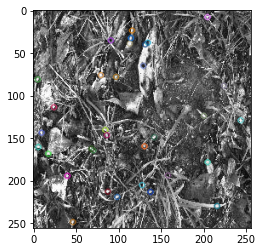

In [20]:
img1 = plt.imread("C:/Users/SHARMISHA/Desktop/Programming Assignment 1/Weed-4class-67/20170128-102843-0.jpg")  
g1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)


sift = cv2.SIFT_create(nfeatures=45, edgeThreshold=25, contrastThreshold=0.06)
keypoints = sift.detect(g1,None)
img_1 = cv2.drawKeypoints(g1,keypoints,img1)
plt.imshow(img_1,cmap="gray")
plt.show()